**Install required packages**

In [1]:
!pip install mediapipe opencv-python-headless scikit-learn pandas numpy matplotlib seaborn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 7.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.rcParams['figure.dpi'] = 120
sns.set_theme(style ='whitegrid', palette ='Set2')
print('All libraries imported successfully')

All libraries imported successfully


# **Data Loading & Visualization**

**Load Dataset**

In [3]:
Data_Path = "/content/hand_landmarks_data.csv"
df = pd.read_csv(Data_Path , sep ="," , header = 0 ,encoding = "utf-8")
print("Hand Landmarks Dataset Loaded Successfully")

Hand Landmarks Dataset Loaded Successfully


In [4]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (25675, 64)


In [5]:
print(f'Columns (first 10): {df.columns.tolist()[:10]} ...')
df.head()

Columns (first 10): ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4'] ...


,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [6]:
print('\n Dataset Info:')
print(f'  Total samples : {len(df):,}')
print(f'  Total features: {df.shape[1] - 1}')
print(f'  Label column  : {df.columns[-1]}')
print(f'  Classes       : {df[df.columns[-1]].nunique()}')


 Dataset Info:
  Total samples : 25,675
  Total features: 63
  Label column  : label
  Classes       : 18


In [7]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [8]:
print(df.dtypes)

x1       float64
y1       float64
z1       float64
x2       float64
y2       float64
          ...   
z20      float64
x21      float64
y21      float64
z21      float64
label     object
Length: 64, dtype: object


In [9]:
print("\nDataset Info:")
print("-" * 50)
df.info()


Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7    

In [10]:
Missing_Values = df.isnull().sum()
Total_Missing = Missing_Values.sum()
print("Total Missing Values:", Total_Missing)

Total Missing Values: 0


**Class Distribution**

In [11]:
df['label'].unique()

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

In [12]:
label_column = "label"
class_counts = df[label_column].value_counts()
print("\nClass Counts:")
display(class_counts)


Class Counts:


,count
label,
three2,1653
palm,1649
four,1634
ok,1592
stop_inverted,1567
call,1506
peace_inverted,1497
stop,1482
rock,1458


**Visualize Class Imbalance**

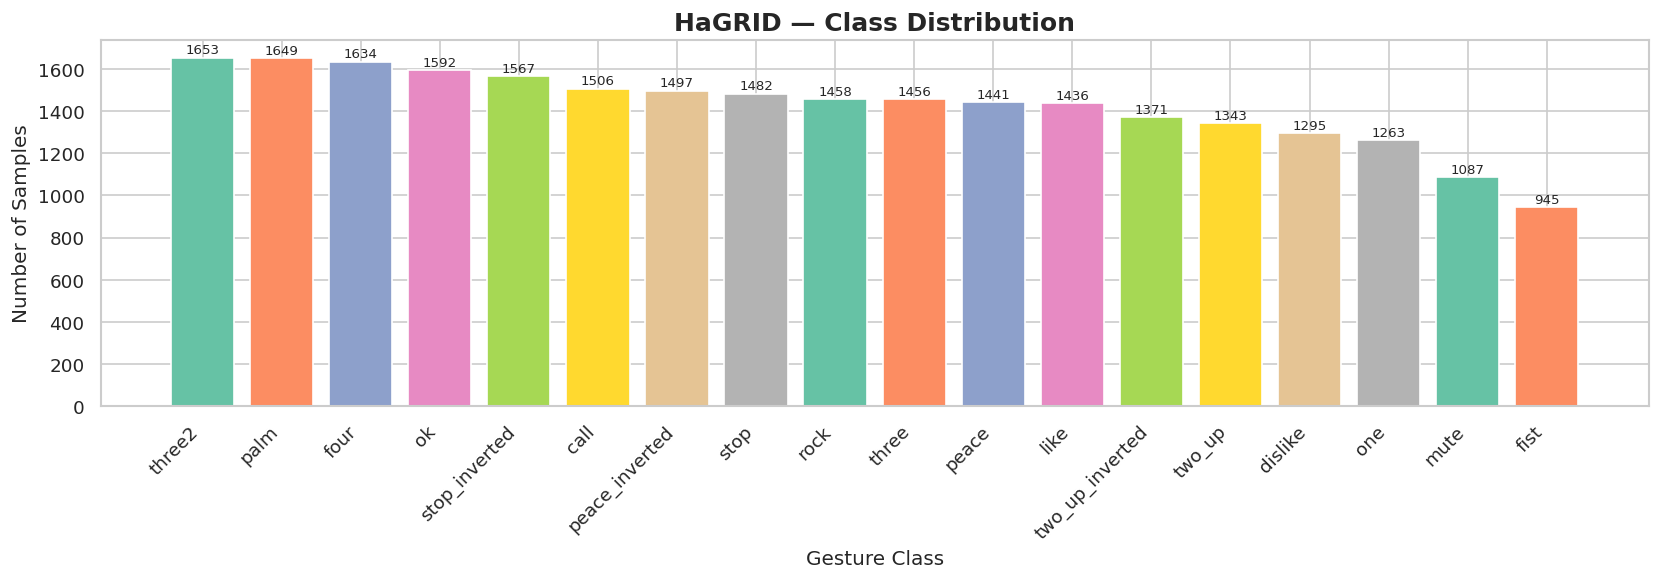

In [13]:
label_col = df.columns[-1]
counts = df[label_col].value_counts()

fig, ax = plt.subplots(figsize=(14, 5))
bars = ax.bar(counts.index, counts.values, color=sns.color_palette('Set2', len(counts)))
ax.set_title('HaGRID — Class Distribution', fontsize=15, fontweight='bold')
ax.set_xlabel('Gesture Class')
ax.set_ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
for bar, val in zip(bars, counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            str(val), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

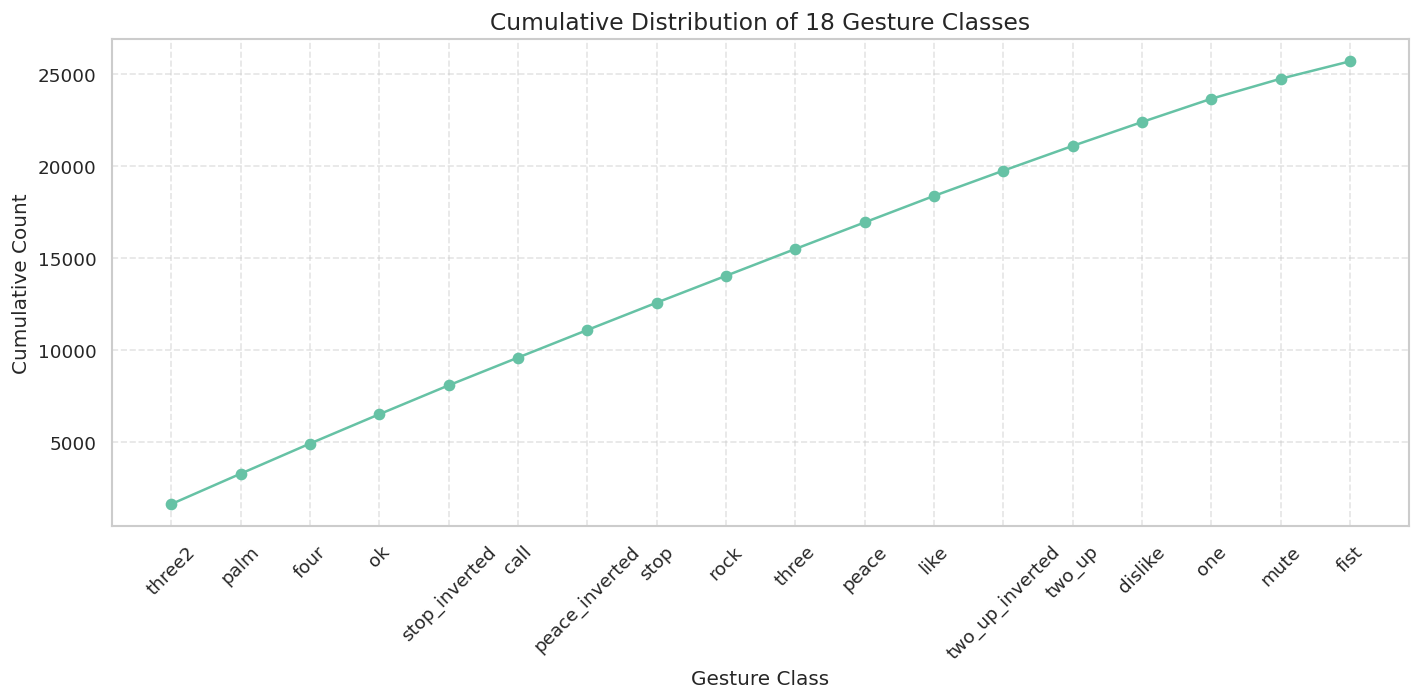

In [14]:
plt.figure(figsize=(12,6))
plt.plot(
    class_counts.sort_values(ascending=False).cumsum().values,
    marker='o', linestyle='-'
)
plt.xticks(range(18), class_counts.sort_values(ascending=False).index, rotation=45)
plt.title("Cumulative Distribution of 18 Gesture Classes", fontsize=14)
plt.ylabel("Cumulative Count")
plt.xlabel("Gesture Class")
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


**Hand Landmark Visualization**

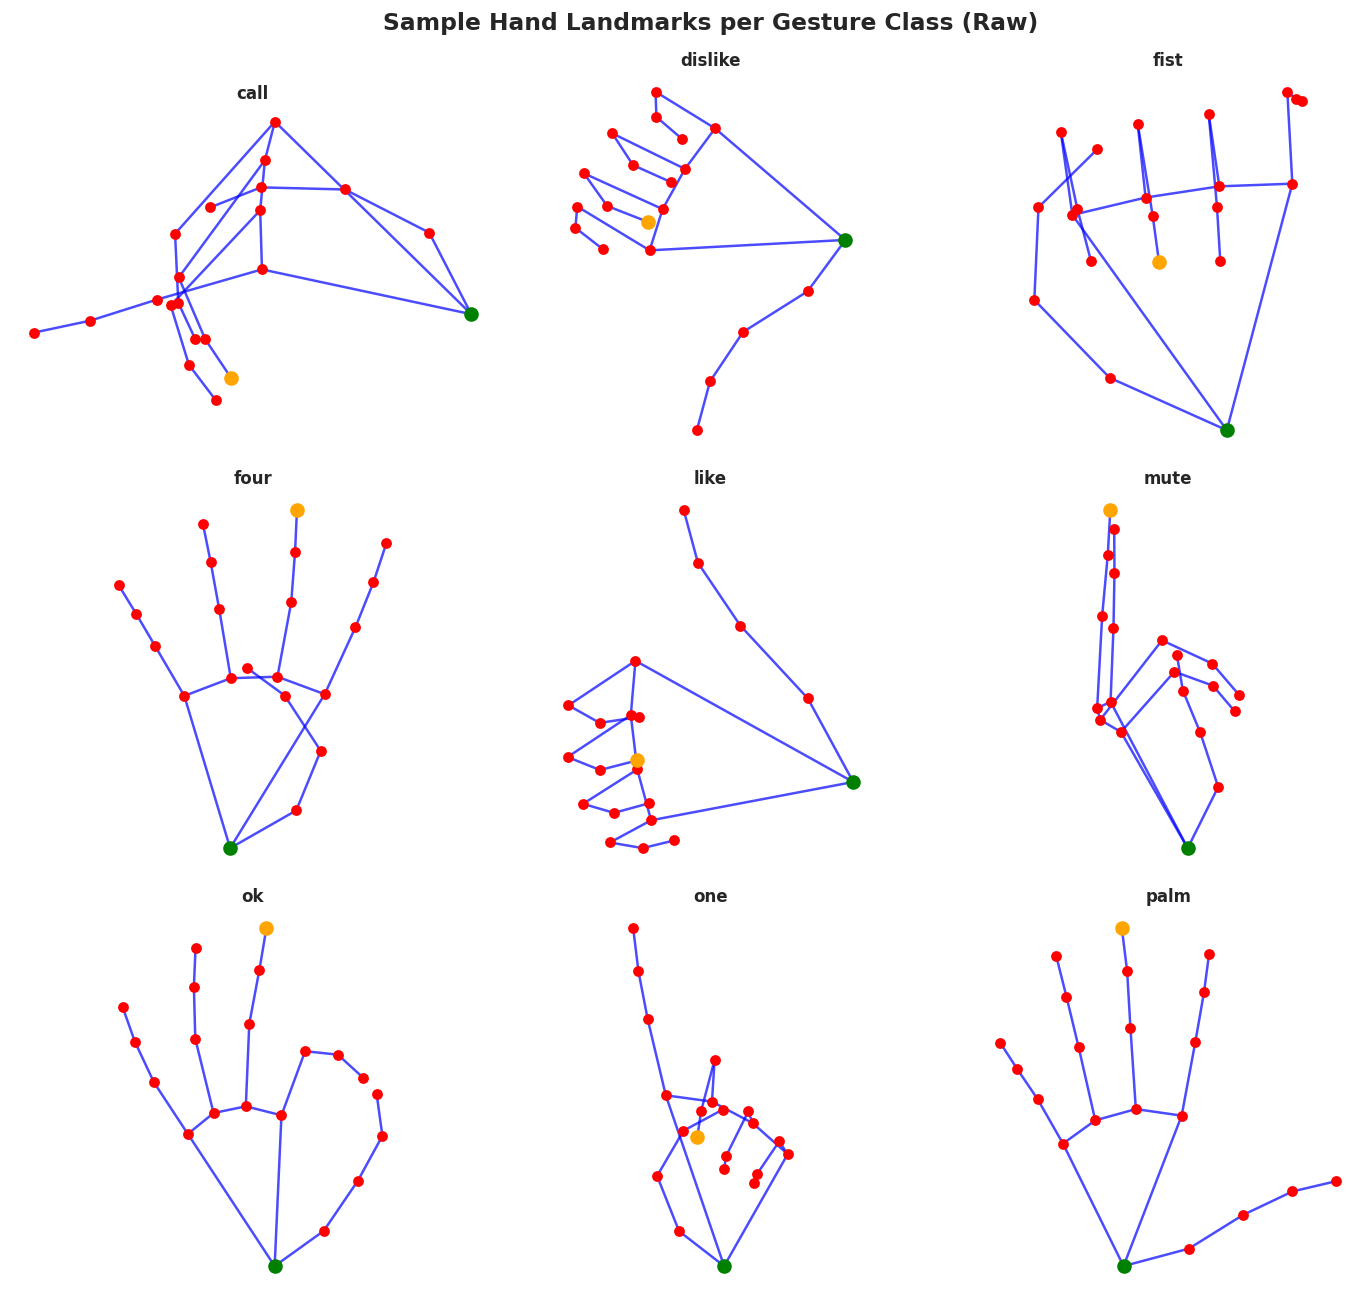

In [15]:
HAND_CONNECTIONS = [
    (0,1),(1,2),(2,3),(3,4),          # Thumb
    (0,5),(5,6),(6,7),(7,8),          # Index
    (5,9),(9,10),(10,11),(11,12),     # Middle
    (9,13),(13,14),(14,15),(15,16),   # Ring
    (13,17),(17,18),(18,19),(19,20),  # Pinky
    (0,17)
]

def plot_hand(ax, row, title=''):
    """Plot a single hand landmark sample."""
    xs = [row[f'x{i}'] for i in range(1,22)]
    ys = [row[f'y{i}'] for i in range(1,22)]
    for start, end in HAND_CONNECTIONS:
        ax.plot([xs[start], xs[end]], [ys[start], ys[end]], 'b-', linewidth=1.5, alpha=0.7)
    ax.scatter(xs, ys, c='red', s=30, zorder=5)
    ax.scatter(xs[0], ys[0], c='green', s=60, zorder=6, label='Wrist')  # wrist
    ax.scatter(xs[12], ys[12], c='orange', s=60, zorder=6, label='Mid-tip')  # mid tip
    ax.set_title(title, fontsize=10, fontweight='bold')
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.axis('off')


classes = df[label_col].unique()[:9]
fig, axes = plt.subplots(3, 3, figsize=(12, 11))
fig.suptitle('Sample Hand Landmarks per Gesture Class (Raw)', fontsize=14, fontweight='bold')

for ax, cls in zip(axes.flatten(), classes):
    sample = df[df[label_col] == cls].iloc[0]
    plot_hand(ax, sample, title=cls)

plt.tight_layout()
plt.show()

In [16]:
row = df.iloc[[11480]]
row

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
11480,278.986771,244.294017,1.833548e-07,262.584846,238.484642,-0.012291,248.78167,229.453519,-0.020595,238.278488,...,299.239471,199.822577,-0.037286,303.200317,192.854725,-0.041019,306.615715,186.865053,-0.043507,palm


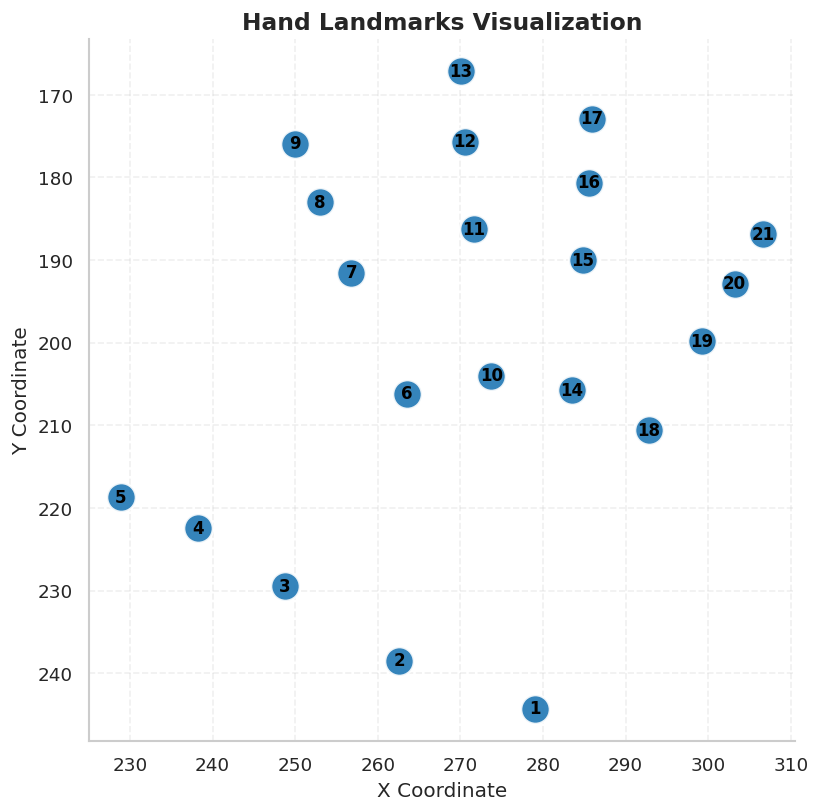

In [17]:
x_values = [row[f'x{i}'].values[0] for i in range(1, 22)]
y_values = [row[f'y{i}'].values[0] for i in range(1, 22)]

plt.figure(figsize=(7, 7))
plt.scatter(
    x_values,
    y_values,
    s=300,
    c="#1f77b4",
    edgecolors="white",
    linewidth=1.5,
    alpha=0.9
)


for i in range(21):
    plt.text(
        x_values[i],
        y_values[i],
        str(i+1),
        fontsize=10,
        weight='bold',
        ha='center',
        va='center',
        color='black'
    )

plt.xlabel("X Coordinate", fontsize=12)
plt.ylabel("Y Coordinate", fontsize=12)
plt.title("Hand Landmarks Visualization", fontsize=14, weight='bold')

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')  # Keep proportions correct

plt.grid(True, linestyle="--", alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

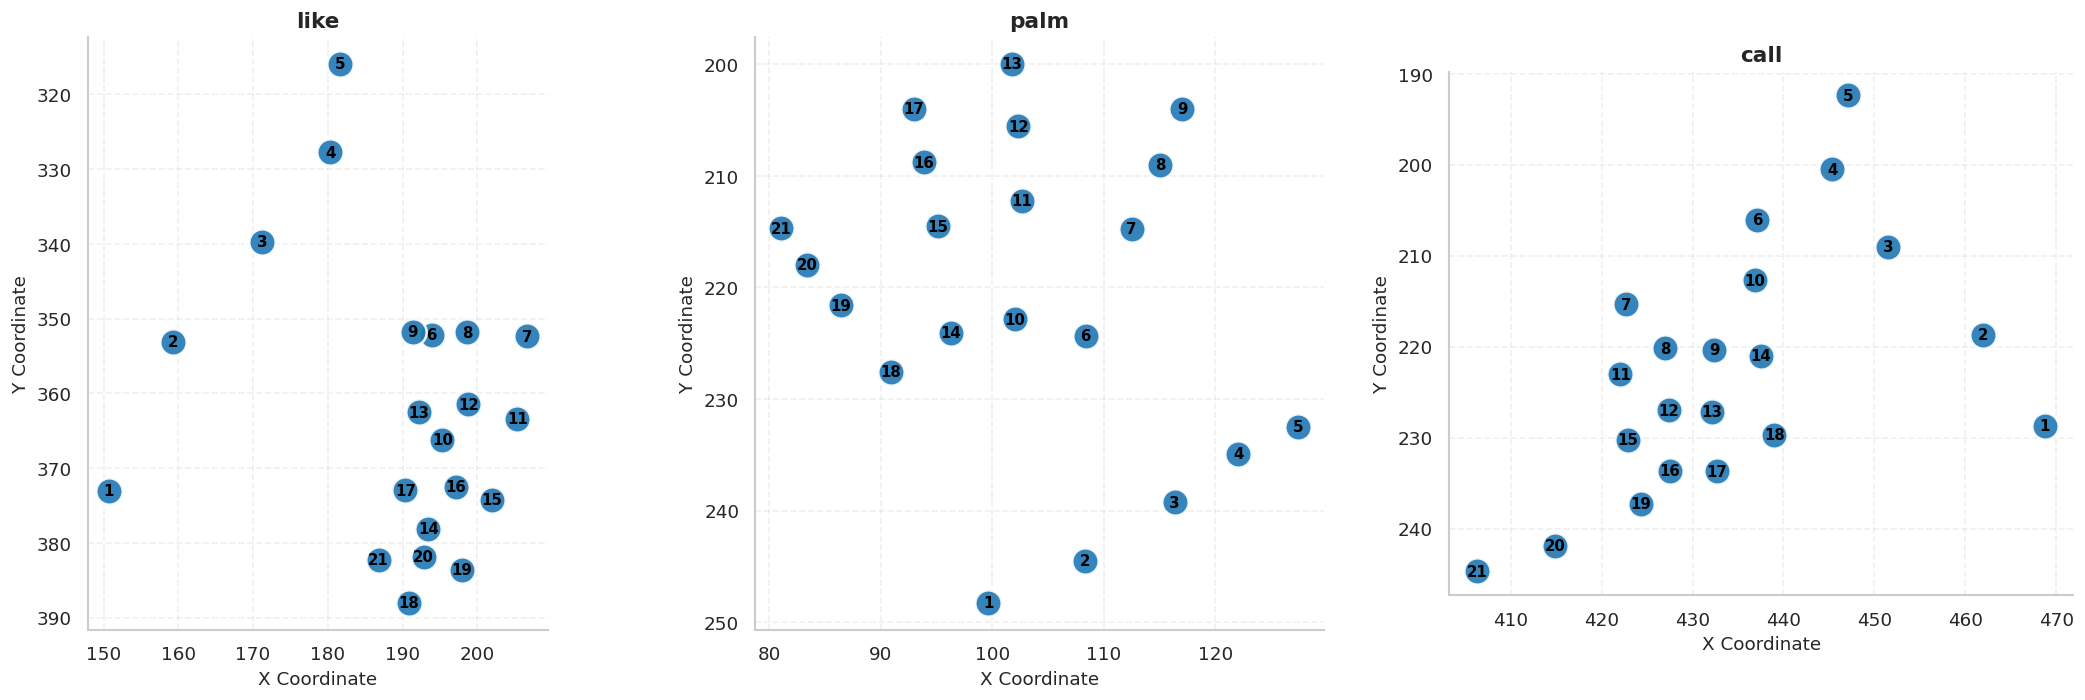

In [18]:
rows = df.iloc[[6100, 12000,1500]]
plt.figure(figsize=(18, 6))

for idx, (_, row_data) in enumerate(rows.iterrows()):

    x_values = [row_data[f'x{i}'] for i in range(1, 22)]
    y_values = [row_data[f'y{i}'] for i in range(1, 22)]

    plt.subplot(1, 3, idx + 1)

    plt.scatter(
        x_values,
        y_values,
        s=250,
        c="#1f77b4",
        edgecolors="white",
        linewidth=1.5,
        alpha=0.9
    )

    for i in range(21):
        plt.text(
            x_values[i],
            y_values[i],
            str(i+1),
            fontsize=9,
            weight='bold',
            ha='center',
            va='center',
            color='black'
        )

    plt.xlabel("X Coordinate", fontsize=11)
    plt.ylabel("Y Coordinate", fontsize=11)
    plt.title(f"{row_data['label']}",fontsize=13, weight='bold')
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()